In [1]:
from Portefeuille import Portfeuille
from PM_strategy import CRP,BHP
import seaborn as sns
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt

SYMBOLS = ['ETHBTC','XRPBTC','EOSBTC','LTCBTC','ZECBTC','ETCBTC','XMRBTC']
START = datetime.datetime(2017,8,1)
END = datetime.datetime(2020,4,1)
Port = Portfeuille(SYMBOLS,START,END)


ETHBTC    0.079361
XRPBTC    0.000053
EOSBTC    0.000530
LTCBTC    0.013556
ZECBTC    0.061797
ETCBTC    0.004502
XMRBTC    0.015000
Name: 2017-08-08 00:00:00, dtype: float64


In [2]:
y = CRP(Port.df_normalized,START,END)
CRP_cum_return = np.cumprod(y) - 1
y2= BHP(Port.df_normalized,START,END)
HBP_cum_return = np.cumprod(y2) - 1
x = pd.date_range(start=START,end=END,freq='30min')

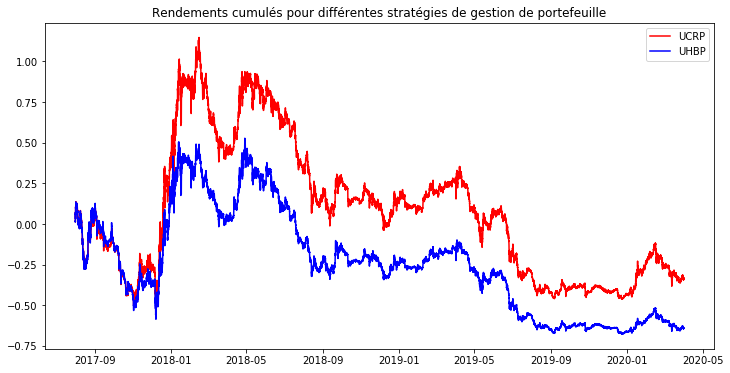

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x=x,y=CRP_cum_return,color = 'red')
sns.lineplot(x=x,y=HBP_cum_return,color = 'blue')
plt.legend(('UCRP','UHBP'),loc='upper right')
plt.title('Rendements cumulés pour différentes stratégies de gestion de portefeuille')
plt.show()

In [9]:
from universal import tools
from universal import algos

In [3]:
algo = algos.OLMAR(window=5, eps=10)

In [4]:
result = algo.run(Port.df_close)
result.fee = 0.002

Summary:
    Profit factor: 1.48
    Sharpe ratio: 14.66
    Information ratio (wrt UCRP): 18.76
    UCRP sharpe: -0.23
    Beta / Alpha: 1.10 / 23.563%
    Annualized return: 755023571.33%
    Annualized volatility: 108.31%
    Longest drawdown: 13 days
    Max drawdown: 28.19%
    Winning days: 57.6%
    Turnover: 55011.4
        


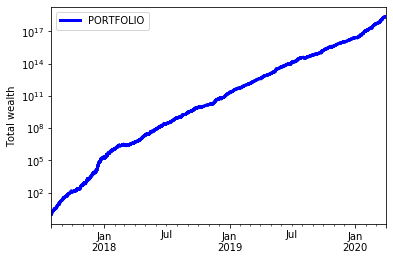

In [11]:
print(result.summary())
result.plot(weights=False, assets=False, ucrp=False, logy=True)

In [10]:
etats = np.array([(Port.df_close.shift(-1) / Port.df_close).fillna(1).values,(Port.df_high.shift(-1) / Port.df_high).fillna(1).values,(Port.df_low.shift(-1) / Port.df_low).fillna(1).values],dtype='float')

In [11]:
etats

array([[[0.99721285, 1.00515464, 0.99489278, ..., 1.00153671,
         0.99389783, 1.        ],
        [0.99124526, 1.00564103, 1.00529797, ..., 0.97589784,
         1.        , 0.98876325],
        [1.00013822, 0.98487166, 0.98366612, ..., 0.99903372,
         0.99616016, 1.02101351],
        ...,
        [0.99869823, 0.9937523 , 0.99788681, ..., 1.        ,
         1.        , 0.9967776 ],
        [1.00980014, 1.0114645 , 1.01015317, ..., 1.0024985 ,
         1.00168831, 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.01054645, 1.01265174, 0.99869146, ..., 1.00307343,
         1.0075688 , 1.00063385],
        [0.99464662, 0.99881817, 0.99247816, ..., 0.99687216,
         0.98606949, 1.00893863],
        [0.98348646, 0.99475997, 0.99584386, ..., 0.99679831,
         1.00694045, 0.99881409],
        ...,
        [1.00019257, 0.99963249, 0.99939243, ..., 1.        ,
         1.        , 1.00279445],
        [1.0

In [ ]:
(self.df_open.shift(-1) / self.df_open).fillna(1)

In [15]:
#def states(self,portefeuille,window_size)
portefeuille = Port
state = []
window_size = 48
df = np.array([portefeuille.df_close.values,portefeuille.df_high.values,portefeuille.df_low.values], dtype='float')
for j in range(portefeuille.idx_depart -1, len(df[0])):
    temp = np.copy(df[:, j-window_size+1:j+1 , :])
    for feature in range(df.shape[0]):
        for k in range(portefeuille.num_symbols):
            if temp[feature,-1,k] == 0:
                temp[feature,:,k] /= temp[feature,-2,k]
            else:
                temp[feature,:,k] /= temp[feature,-1,k]
    state.append(temp)

(3, 46753, 7)


In [10]:
state[0][0].shape

(48, 7)

In [12]:
state[0].shape

(4, 48, 7)

In [2]:
Port.idx_depart

336

In [22]:
len(df[0])

46753